# **Importing necessary packages** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

# **CONVERTING DATASET INTO DATAFRAME**

In [ ]:
data_set= pd.read_csv("/content/oasis_longitudinal.csv")
data_set.replace('Converted','Demented',inplace=True)
data_set['M/F'].replace(['F','M'],[0,1],inplace=True)
data_set

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,1,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,1,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,1,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,1,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,1,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,0,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,0,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
data_set['Group'].unique()

array(['Nondemented', 'Demented'], dtype=object)

# **FINDING WHICH COLUMNS HAS NULL VALUES**

In [ ]:
data_set.isnull().any()

Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
M/F           False
Hand          False
Age           False
EDUC          False
SES            True
MMSE           True
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool

In [ ]:
data_set.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

#**Droping the  rows and columns which has missing values**

In [ ]:
# Dropped the  rows and columns which has missing values 
ds=data_set.drop(['SES'],axis=1)
ds=ds.dropna(how='any',axis=0)
ds.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
ds['Group'].nunique()

2

# **Spliting input_features and output_feature**

In [ ]:
ds.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [ ]:
x = ds.drop(['Subject ID', 'MRI ID','Hand','Group'],axis=1)
y = ds['Group']
print(ds.shape,x.shape,y.shape,sep='\n')

(371, 14)
(371, 10)
(371,)


# **Spliting Dataset in ratio 80:20**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train , Y_test= train_test_split(x, y, test_size=0.20)
print(x.shape,y.shape)
sp=[X_train,X_test,Y_train , Y_test]
for h in sp:
  print(h.shape)

(371, 10) (371,)
(296, 10)
(75, 10)
(296,)
(75,)


#**Importing,Training and validating Classification Algorithms**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC # "Support vector classifier"
svm_classifier = SVC(kernel='linear', random_state=0) 
l1=['KNeighborsClassifier','DecisionTreeClassifier','GaussianNB','RandomForestClassifier','XGBClassifier','SVM_classifier']
kn , dt , nb , rf , boost =  KNeighborsClassifier() , DecisionTreeClassifier() , GaussianNB() , RandomForestClassifier() , XGBClassifier()
algo_list=[ kn , dt , nb , rf , boost ,svm_classifier]
for i in algo_list:
  i.fit(X_train,Y_train)
predicted1=[j.predict(X_test) for j in algo_list]

In [ ]:
from sklearn.metrics import classification_report
for h in range(len(predicted1)):
  
  print('\t\t{}.{}\n\n{}'.format(h+1,l1[h],classification_report(Y_test,predicted1[h])))


		1.KNeighborsClassifier

              precision    recall  f1-score   support

    Demented       0.65      0.53      0.59        45
 Nondemented       0.45      0.57      0.50        30

    accuracy                           0.55        75
   macro avg       0.55      0.55      0.54        75
weighted avg       0.57      0.55      0.55        75

		2.DecisionTreeClassifier

              precision    recall  f1-score   support

    Demented       0.96      0.96      0.96        45
 Nondemented       0.93      0.93      0.93        30

    accuracy                           0.95        75
   macro avg       0.94      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75

		3.GaussianNB

              precision    recall  f1-score   support

    Demented       0.98      0.96      0.97        45
 Nondemented       0.94      0.97      0.95        30

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weig

	
KNeighborsClassifier=0.5466666666666666



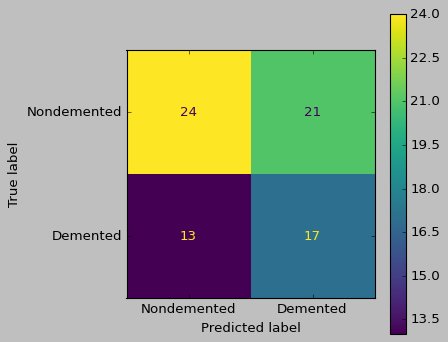

	
DecisionTreeClassifier=0.9466666666666667



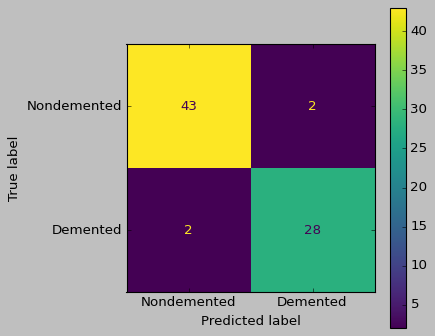

	
GaussianNB=0.96



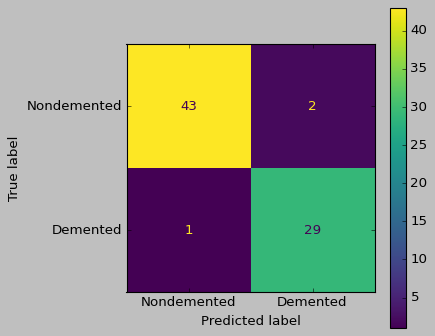

	
RandomForestClassifier=0.96



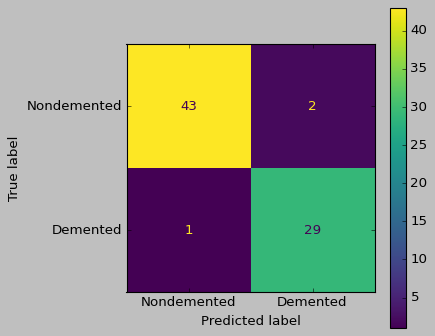

	
XGBClassifier=0.96



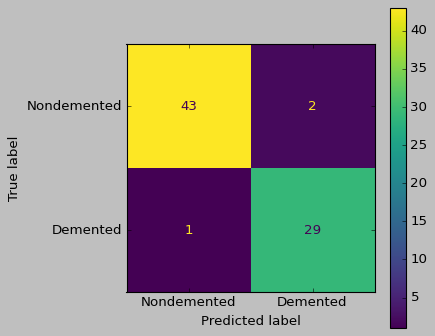

	
SVM_Classifier=0.96



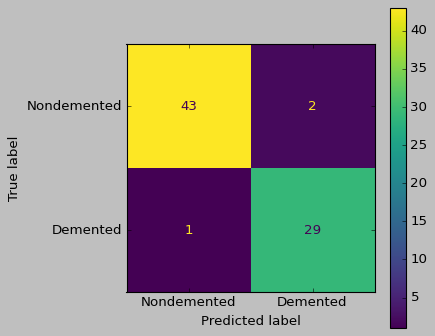

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
p_m=[confusion_matrix(Y_test,i) for i in predicted1]
cm_display = [ConfusionMatrixDisplay(confusion_matrix = j , display_labels = ['Nondemented', 'Demented']*2)  for j in p_m]
for i in range(len(cm_display)):
  print('\t\n{}={}\n'.format(l1[i],accuracy_score(Y_test,predicted1[i])))
  cm_display[i].plot()
  plt.gcf().set_size_inches(5, 5)
  plt.style.use('classic')
  plt.show()

#**Feature_importance**

In [ ]:
feature_importance=pd.DataFrame(rf.feature_importances_,index=x.columns,columns=['importance']).sort_values('importance')
feature_importance.head(20)

,importance
Visit,0.009377
M/F,0.013305
MR Delay,0.019543
EDUC,0.032185
Age,0.043666
eTIV,0.051902
ASF,0.062025
nWBV,0.069385
MMSE,0.144518
CDR,0.554096


In [ ]:
xf=x.drop(['Visit'],axis=1)
yf=y
x_train,x_test,y_train,y_test=train_test_split(xf,yf,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC # "Support vector classifier"
svm_classifier = SVC(kernel='linear', random_state=0) 
l1=['KNeighborsClassifier','DecisionTreeClassifier','GaussianNB','RandomForestClassifier','XGBClassifier','SVM_Classifier']
kn , dt , nb , rf , boost =  KNeighborsClassifier() , DecisionTreeClassifier() , GaussianNB() , RandomForestClassifier() , XGBClassifier()
algo_list=[ kn , dt , nb , rf , boost,svm_classifier]
for i in algo_list:
  i.fit(x_train,y_train)
predicted=[j.predict(x_test) for j in algo_list]

In [ ]:
from sklearn.metrics import classification_report
for h in range(len(predicted)):
  
  print('\t\t{}.{}\n\n{}'.format(h+1,l1[h],classification_report(y_test,predicted[h])))

		1.KNeighborsClassifier

              precision    recall  f1-score   support

    Demented       0.41      0.44      0.42        32
 Nondemented       0.56      0.53      0.55        43

    accuracy                           0.49        75
   macro avg       0.49      0.49      0.49        75
weighted avg       0.50      0.49      0.49        75

		2.DecisionTreeClassifier

              precision    recall  f1-score   support

    Demented       0.89      1.00      0.94        32
 Nondemented       1.00      0.91      0.95        43

    accuracy                           0.95        75
   macro avg       0.94      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

		3.GaussianNB

              precision    recall  f1-score   support

    Demented       0.97      1.00      0.98        32
 Nondemented       1.00      0.98      0.99        43

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weig

	
KNeighborsClassifier=0.49333333333333335



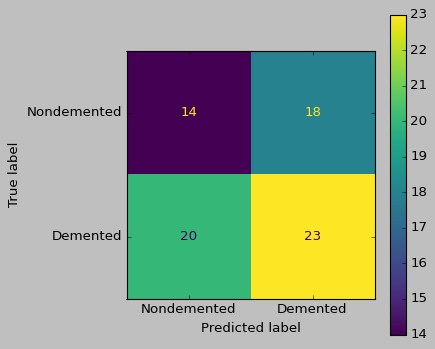

	
DecisionTreeClassifier=0.9466666666666667



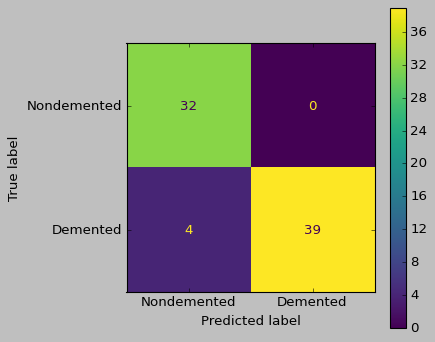

	
GaussianNB=0.9866666666666667



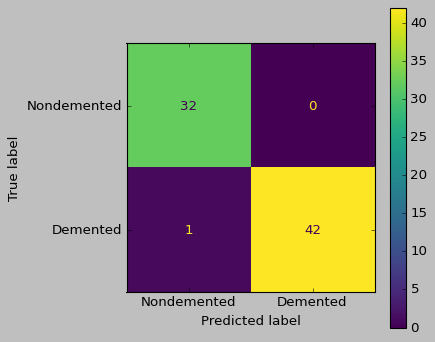

	
RandomForestClassifier=0.9866666666666667



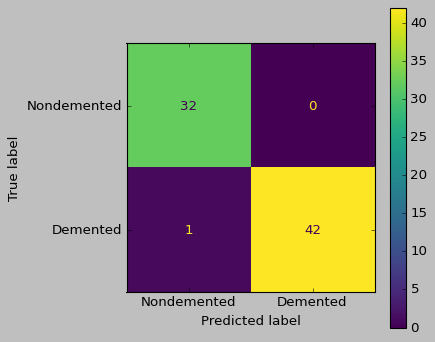

	
XGBClassifier=0.9866666666666667



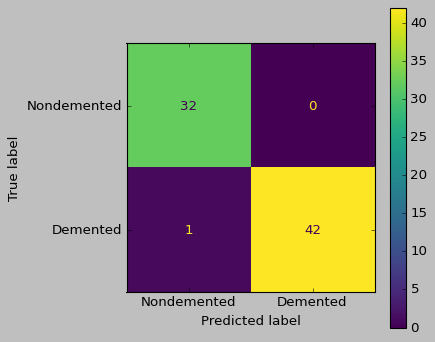

	
SVM_Classifier=0.9866666666666667



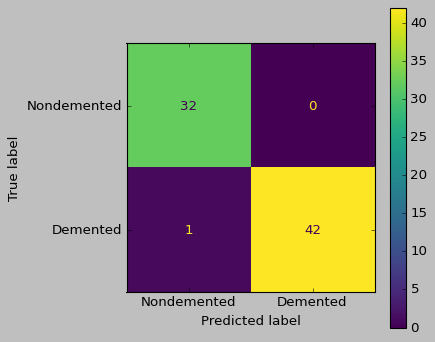

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
p_m=[confusion_matrix(y_test,i) for i in predicted]
cm_display = [ConfusionMatrixDisplay(confusion_matrix = j , display_labels = ['Nondemented', 'Demented']*2)  for j in p_m]
for i in range(len(cm_display)):
  print('\t\n{}={}\n'.format(l1[i],accuracy_score(y_test,predicted[i])))
  cm_display[i].plot() 
  plt.gcf().set_size_inches(5, 5)
  plt.style.use('classic')
  plt.show()


#**COMPARISION OF ALGORITHMS**

In [ ]:
from sklearn.metrics import accuracy_score
j1=[accuracy_score(Y_test,i) for i in predicted1]
j2=[accuracy_score(y_test,i) for i in predicted]
group=[[j1[i],j2[i]] for i in range(len(j1))]
list_of_algo=l1

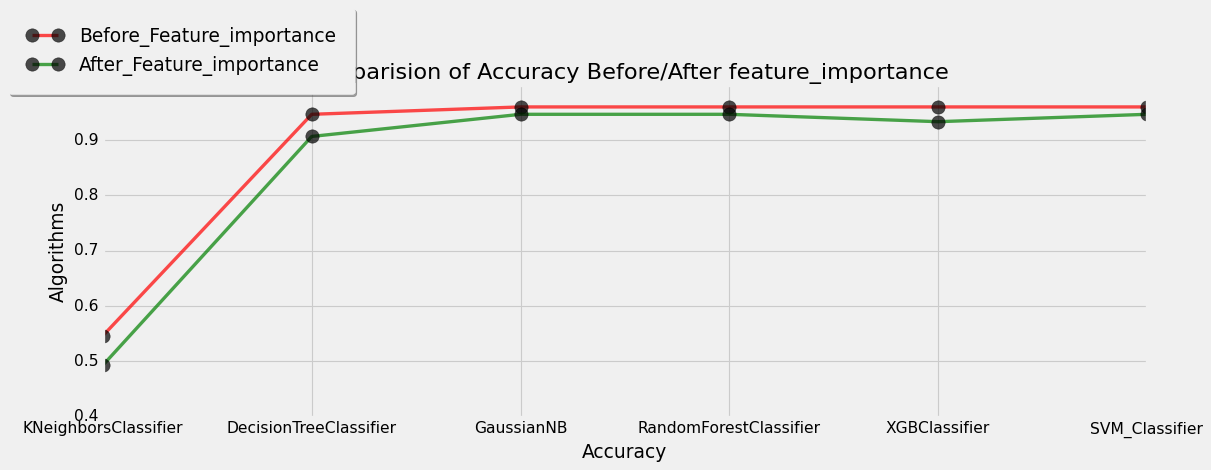

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(list_of_algo,j1,c='r',alpha=0.7,linestyle = 'solid', marker = 'o',markerfacecolor = 'k', markersize = 12,label='Before_Feature_importance',linewidth=3)
plt.plot(list_of_algo,j2,c='g',alpha=0.7,linestyle = 'solid', marker = 'o',markerfacecolor = 'k', markersize = 12,label='After_Feature_importance',linewidth=3)
plt.xlabel("Accuracy")
plt.ylabel("Algorithms")
plt.legend(bbox_to_anchor =(0.25, 1.26), ncol = 1,fancybox=True, frameon=True,framealpha=1, shadow=True, borderpad=1)
plt.title("Comparision of Accuracy Before/After feature_importance")
plt.show()
